''' 

=================================================================================================

Program ini dibuat untuk melakukan statistik deskriptif analisis dan statistik inferensial analisis dari topik Analisis Pemasaran Perbankan Untuk Meningkatkan Keberhasilan Kampanye

=================================================================================================

''' 

URL DASHBOARD: https://public.tableau.com/app/profile/taara.mona/viz/M1_16948677211090/Dashboard1?publish=yes

# **IDENTIFIKASI MASALAH**

**PROBLEM STATEMENT:**

Dalam industri perbankan yang semakin kompetitif, sangat penting bagi bank untuk mengoptimalkan strategi pemasaran yang berguna untuk meningkatkan keberhasilan kampanye pemasaran deposito sebanyak 20% dengan mengetahui faktor-faktor apa saja yang memengaruhi keputusan nasabah untuk berlangganan deposito agar nama baik bank bisa tetep terjaga selama 6 bulan. Oleh karena itu, bank perlu memahami dengan lebih baik profil nasabah.

**SMART FRAMEWORK:**

- SPECIFIC: Meningkatkan keberhasilan kampanye pemasaran deposito perbankan dengan mengidentifikasi faktor-faktor yang memengaruhi keputusan nasabah untuk berlangganan deposito 

- MEASURABLE: Meningkatkan banyaknya nasabah yang berlangganan deposito sebanyak 20%

- ACHIEVABLE: Mengetahui faktor-faktor yang memengaruhi keputusan nasabah untuk berlangganan deposito

- RELEVANT: Peningkatan banyaknya nasabah yang berlangganan berguna untuk membuat citra bank semakin baik dikala perkembangan industri perbankan yang semakin kompetitif

- TIME-BOUND: Selama 6 bulan nasabah yang berlangganan mencapai 20%


**5W + 1H:**

- Berapa persentase untuk nasabah yang sudah berlangganan dan yang belum berlangganan?
- Berapa banyak orang yang sudah berlangganan berdasarkan job, marital, dan education?
- Berapa banyak nasabah yang sudah berlangganan dan yang belum berlangganan berdasarkan kategori usia?
- Bulan berapa kampanye paling banyak dilakukan?
- Bagaimana persebaran data usia nasabah yang sudah berlangganan?
- Faktor-faktor apa yang mempengaruhi keputusan nasabah untuk berlangganan deposito?

# **DATA LOADING**

MEMBACA CSV FILE DENGAN PANDAS pd.read_csv

In [1]:
# IMPORT LIBRARY PANDAS
import pandas as pd

# MEMBACA FILE CSV MENGGUNAKAN SEP PARAMETER KE DALAM DATAFRAME
data = pd.read_csv('Banking_Dataset.csv', sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


PENJELASAN NAMA-NAMA KOLOM:

- age : umur nasabah
- job : jenis pekerjaan
- marital : status perkawinan
- education : pendidikan
- default : apakah kreditnya default?
- balance : saldo rata-rata tahunan
- housing : apakah memiliki pinjaman rumah?
- loan : apakah memiliki pinjaman pribadi?
- contact : jenis komunikasi kontak
- day : hari kontak terakhir dalam sebulan
- month : bulan kontak terakhir dalam setahun
- durasi : durasi kontak terakhir (detik)
- kampanye : jumlah kontak yang dilakukan selama kampanye ini
- pday : jumlah hari yang berlalu setelah klien terakhir dihubungi
- previous : jumlah kontak yang dilakukan sebelum kampanye ini
- poutcome : hasil kampanye pemasaran sebelumnya
- y : apakah klien sudah berlangganan deposito

MENGCOPY DATASET KE VARIBEL 'df'

In [2]:
df = data.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


EKSPLORASI DATA

In [3]:
# MENAMPILKAN 10 SAMPLE DATA

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3620,60,retired,divorced,secondary,no,598,no,yes,cellular,8,jul,96,1,-1,0,unknown,no
1882,34,technician,single,secondary,no,440,yes,no,cellular,6,may,445,2,345,2,failure,no
1782,31,blue-collar,single,secondary,no,-219,yes,no,unknown,30,may,66,2,-1,0,unknown,no
2408,46,blue-collar,married,secondary,no,0,yes,no,cellular,8,may,264,2,-1,0,unknown,no
3129,42,blue-collar,divorced,unknown,no,0,no,no,cellular,7,jul,64,2,-1,0,unknown,no
4385,32,entrepreneur,divorced,secondary,no,1121,yes,yes,cellular,16,apr,211,3,-1,0,unknown,no
1686,47,technician,married,secondary,no,302,yes,no,unknown,20,jun,89,3,-1,0,unknown,no
393,35,technician,married,secondary,no,0,no,no,cellular,27,aug,106,4,-1,0,unknown,no
2023,48,admin.,married,secondary,no,8,no,yes,cellular,7,jul,46,1,-1,0,unknown,no
4470,31,technician,single,tertiary,no,1166,yes,no,unknown,3,jun,207,1,-1,0,unknown,no


In [4]:
# MELIHAT SUMMARY DATASET DAN LIST NAMA-NAMA KOLOM

df.info()
print(list(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', '

# **DATA CLEANING**

- Tidak ada missing values
- Tidak ada duplicate values

##### MENCARI MISSING VALUES

In [7]:
#MENGECEK APAKAH ADA MISSING VALUES

missing_values = df.isnull().sum()
# print(missing_values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


##### CEK VALUES YANG DUPLIKAT

In [8]:
# MENGECEK APAKAH ADA DUPLIKAT VALUE

print(df.duplicated().value_counts())

False    4521
dtype: int64


##### MENGHAPUS TITIK PADA VALUES KOLOM JOB

In [9]:
# MELIHAT VALUES UNIQUE DARI KOLOM JOB

df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [10]:
# MENGHAPUS TITIK DI VALUES JOB MENJADI ''

df['job'] = df['job'].str.replace('.', '')
df.sample(10)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6876\2091659145.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['job'] = df['job'].str.replace('.', '')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1462,33,unknown,married,secondary,no,2727,no,no,cellular,6,aug,205,3,-1,0,unknown,no
1558,29,admin,single,secondary,no,3432,yes,no,cellular,17,apr,139,2,-1,0,unknown,no
546,47,self-employed,married,secondary,yes,2,no,no,cellular,5,feb,236,2,-1,0,unknown,no
2659,59,admin,married,secondary,no,92,yes,no,cellular,12,may,139,2,350,1,failure,no
19,31,services,married,secondary,no,132,no,no,cellular,7,jul,148,1,152,1,other,no
2278,34,technician,single,secondary,no,943,no,no,cellular,29,aug,96,4,-1,0,unknown,no
2395,35,services,single,secondary,no,35,yes,no,cellular,14,may,152,1,-1,0,unknown,no
2273,44,blue-collar,married,primary,no,-11,yes,no,unknown,9,may,13,1,-1,0,unknown,no
1096,46,technician,married,tertiary,no,217,yes,no,cellular,14,may,141,1,346,2,other,no
3073,67,retired,married,tertiary,no,701,no,no,cellular,6,aug,254,2,-1,0,unknown,yes


##### MENGHAPUS WHITE SPACE

In [11]:
# MENGHAPUS WHITE SPACE MENJADI ''

df.columns = df.columns.str.replace('.', '')
df.sample(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6876\1457116277.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
101,38,management,single,tertiary,no,493,yes,no,cellular,11,may,553,1,367,7,failure,no
2672,39,services,married,secondary,no,-540,no,no,unknown,6,jun,29,1,-1,0,unknown,no
255,55,blue-collar,married,secondary,no,989,yes,yes,unknown,23,may,246,4,-1,0,unknown,no
464,32,blue-collar,married,secondary,no,889,yes,no,cellular,10,sep,185,1,99,5,success,yes
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,apr,654,2,-1,0,unknown,yes
3195,33,services,married,primary,no,6904,no,no,telephone,20,nov,114,2,-1,0,unknown,no
1103,55,blue-collar,married,unknown,no,1665,no,no,telephone,30,jul,89,2,-1,0,unknown,no
2653,45,blue-collar,single,secondary,no,0,yes,no,cellular,26,apr,1472,1,192,4,failure,yes
3673,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,yes
3905,24,blue-collar,married,secondary,no,0,no,no,unknown,28,may,94,1,-1,0,unknown,no


##### MENGHAPUS KOLOM YANG TIDAK DIGUNAKAN

In [12]:
# MENGHAPUS KOLOM

df.drop('default', axis=1, inplace=True)
df.drop('balance', axis=1, inplace=True)
df.drop('housing', axis=1, inplace=True)
df.drop('loan', axis=1, inplace=True)
df.drop('contact', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)
df.drop('pdays', axis=1, inplace=True)
df.drop('previous', axis=1, inplace=True)
df.drop('poutcome', axis=1, inplace=True)

In [13]:
# MENAMPILKAN DATA SETELAH DILAKUKAN DROP COLOUMS

df

,age,job,marital,education,month,campaign,y
0,30,unemployed,married,primary,oct,1,no
1,33,services,married,secondary,may,1,no
2,35,management,single,tertiary,apr,1,no
3,30,management,married,tertiary,jun,4,no
4,59,blue-collar,married,secondary,may,1,no
...,...,...,...,...,...,...,...
4516,33,services,married,secondary,jul,5,no
4517,57,self-employed,married,tertiary,may,1,no
4518,57,technician,married,secondary,aug,11,no
4519,28,blue-collar,married,secondary,feb,4,no


In [14]:
df.to_csv('fixdata.csv', index=False)
print("Berhasil menyimpan ke fixdata.csv")

Berhasil menyimpan ke fixdata.csv


# **ANALISIS DAN PERHITUNGAN**

In [15]:
# IMPORT LIBRARY

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## BERAPA PERSENTASE UNTUK NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN?

In [16]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN DEPOSITO

count_yes = (df['y'] == 'yes').sum()
print("Total nasabah yang sudah berlangganan deposito:", count_yes)

Total nasabah yang sudah berlangganan deposito: 521


In [17]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN DEPOSITO

count_no = (df['y'] == 'no').sum()
print("Total nasabah yang belum berlangganan deposito:", count_no)

Total nasabah yang belum berlangganan deposito: 4000


<Axes: ylabel='y'>

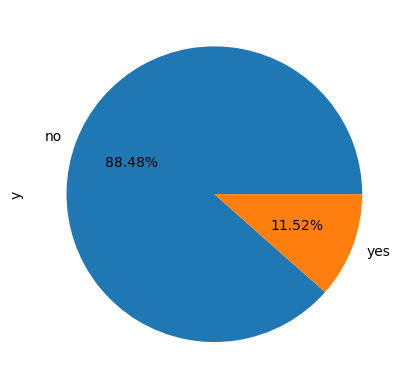

In [18]:
# MEMBUAT PERSENTASE NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN

x = df['y'].value_counts()

x.plot(kind='pie', autopct='%.2f%%')

Persentase nasabah yang sudah berlangganan deposito adalah 11,52%

Persentase nasabah yang belum berlangganan deposito adalah 88,48%

## BERAPA BANYAK ORANG YANG SUDAH BERLANGGANAN BERDASARKAN STATUS PERKAWINAN, JENIS PEKERJAAN, , DAN PENDIDIKAN

#### STATUS PERKAWINAN

In [19]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN BERDASARKAN STATUS PERKAWINAN

total_berlangganan_per_marital = df[df['y'] == 'yes'].groupby('marital').size().reset_index(name='Total')
print("Total nasabah yang sudah berlangganan deposito berdasarkan marital:", total_berlangganan_per_marital)

Total nasabah yang sudah berlangganan deposito berdasarkan marital:     marital  Total
0  divorced     77
1   married    277
2    single    167


In [20]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN BERDASARKAN PERKAWINAN

total_belum_berlangganan_per_marital = df[df['y'] == 'no'].groupby('marital').size().reset_index(name='Total')
print("Total nasabah yang belum berlangganan deposito berdasarkan marital:", total_belum_berlangganan_per_marital)

Total nasabah yang belum berlangganan deposito berdasarkan marital:     marital  Total
0  divorced    451
1   married   2520
2    single   1029


Text(0, 0.5, 'Banyaknya Nasabah')

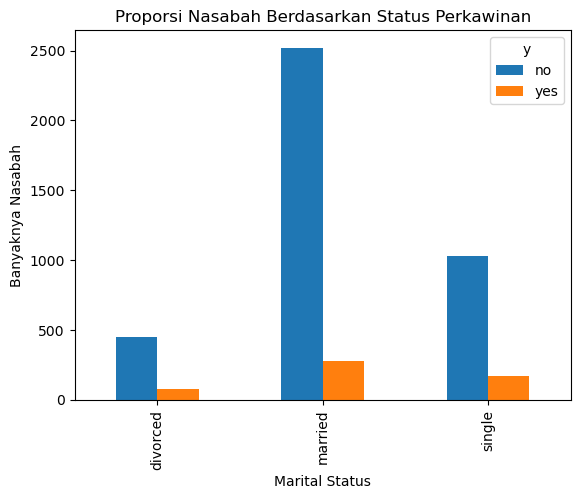

In [21]:
# MELIHAT PERBANDINGAN TOTAL NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN PERKAWINAN

pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.title('Proporsi Nasabah Berdasarkan Status Perkawinan')
plt.xlabel('Marital Status')
plt.ylabel('Banyaknya Nasabah')

Dari hasil chart di atas, kita bisa mengetahui bahwa status perkawinan yang sudah bercerai ada 528 diantaranya 77 nasabah sudah berlangganan dan 451 nasabah yang belum berlangganan. Status perkawinan yang sudah menikah ada 2.797 diantaranya 277 nasabah sudah berlangganan dan 2520 nasabah yang belum berlangganan. Untuk nasabah yang masih lajang/belum menikah ada 1.196 diantaranya 167 nasabah sudah berlangganan dan 1029 nasabah yang belum berlangganan. Jadi dapat disimpulkan bahwa nasabah yang sudah berlangganan lebih mayoritas orang-orang yang sudah menikah

#### JENIS PEKERJAAN

In [22]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN BERDASARKAN JENIS PEKERJAAN

total_berlangganan_per_job = df[df['y'] == 'yes'].groupby('job').size().reset_index(name='Total')
print("Total nasabah yang sudah berlangganan deposito berdasarkan jenis pekerjaan:", total_berlangganan_per_job)

Total nasabah yang sudah berlangganan deposito berdasarkan jenis pekerjaan:               job  Total
0           admin     58
1     blue-collar     69
2    entrepreneur     15
3       housemaid     14
4      management    131
5         retired     54
6   self-employed     20
7        services     38
8         student     19
9      technician     83
10     unemployed     13
11        unknown      7


In [23]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN BERDASARKAN JENIS PEKERJAAN

total_belum_berlangganan_per_job = df[df['y'] == 'no'].groupby('job').size().reset_index(name='Total')
print("Total nasabah yang belum berlangganan deposito berdasarkan jenis pekerjaan:", total_belum_berlangganan_per_job)

Total nasabah yang belum berlangganan deposito berdasarkan jenis pekerjaan:               job  Total
0           admin    420
1     blue-collar    877
2    entrepreneur    153
3       housemaid     98
4      management    838
5         retired    176
6   self-employed    163
7        services    379
8         student     65
9      technician    685
10     unemployed    115
11        unknown     31


Text(0, 0.5, 'Banyaknya Nasabah')

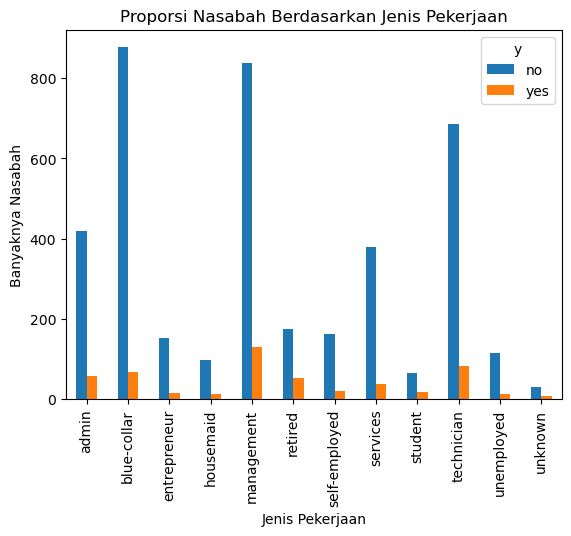

In [24]:
# MELIHAT PERBANDINGAN TOTAL NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN JENIS PEKERJAAN

pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Proporsi Nasabah Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Banyaknya Nasabah')

Dari hasil chart di atas, kita bisa menyimpulkan bahwa nasabah yang sudah berlangganan mayoritas memiliki jenis pekerjaan management dan nasabah yang belum berlangganan mayoritas memiliki jenis pekerjaan blue-collar.

### PENDIDIKAN

In [25]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN BERDASARKAN PENDIDIKAN

total_berlangganan_per_education = df[df['y'] == 'yes'].groupby('education').size().reset_index(name='Total')
print("Total nasabah yang sudah berlangganan deposito berdasarkan education:", total_berlangganan_per_education)

Total nasabah yang sudah berlangganan deposito berdasarkan education:    education  Total
0    primary     64
1  secondary    245
2   tertiary    193
3    unknown     19


In [26]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN BERDASARKAN PENDIDIKAN

total_belum_berlangganan_per_education = df[df['y'] == 'no'].groupby('education').size().reset_index(name='Total')
print("Total nasabah yang belum berlangganan deposito berdasarkan education:", total_belum_berlangganan_per_education)

Total nasabah yang belum berlangganan deposito berdasarkan education:    education  Total
0    primary    614
1  secondary   2061
2   tertiary   1157
3    unknown    168


Text(0, 0.5, 'Banyaknya Nasabah')

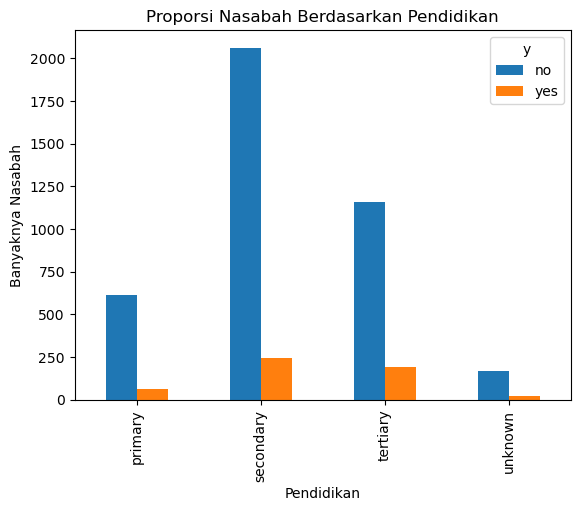

In [27]:
# MELIHAT PERBANDINGAN TOTAL NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN PENDIDIKAN

pd.crosstab(df.education,df.y).plot(kind='bar')
plt.title('Proporsi Nasabah Berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Banyaknya Nasabah')

Dari hasil chart di atas, kita bisa menyimpulkan bahwa nasabah yang sudah berlangganan mayoritas memiliki pendidikan secondary sebanyak 245 dan nasabah yang belum berlangganan mayoritas memiliki pendidikan secondary sebanyak 2061.

## BERAPA BANYAK NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN KATEGORI USIA

In [28]:
a = df['age'].unique()
print(sorted(a))

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87]


In [29]:
# MEMBUAT KATEGORI USIA

df['age_range'] = pd.cut(df['age'], bins=[19, 65, 79, 99], labels=['Pemuda', 'Setengah Baya', 'Orang Tua'])
print(df['age_range'])
data_kategori = df.groupby(['age_range'])['age_range'].count()
data_kategori

0       Pemuda
1       Pemuda
2       Pemuda
3       Pemuda
4       Pemuda
         ...  
4516    Pemuda
4517    Pemuda
4518    Pemuda
4519    Pemuda
4520    Pemuda
Name: age_range, Length: 4521, dtype: category
Categories (3, object): ['Pemuda' < 'Setengah Baya' < 'Orang Tua']


age_range
Pemuda           4434
Setengah Baya      69
Orang Tua          14
Name: age_range, dtype: int64

In [30]:
# MENAMPILKAN KEMBALI DATAFRAME SETELAH PENAMBAHAN KOLOM 'age_range'

df

,age,job,marital,education,month,campaign,y,age_range
0,30,unemployed,married,primary,oct,1,no,Pemuda
1,33,services,married,secondary,may,1,no,Pemuda
2,35,management,single,tertiary,apr,1,no,Pemuda
3,30,management,married,tertiary,jun,4,no,Pemuda
4,59,blue-collar,married,secondary,may,1,no,Pemuda
...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,jul,5,no,Pemuda
4517,57,self-employed,married,tertiary,may,1,no,Pemuda
4518,57,technician,married,secondary,aug,11,no,Pemuda
4519,28,blue-collar,married,secondary,feb,4,no,Pemuda


In [31]:
# MELIHAT JUMLAH NASABAH BERDASARKAN KATEGORI USIA

df2 = df.groupby(['age_range'])['age_range'].count()
df2

age_range
Pemuda           4434
Setengah Baya      69
Orang Tua          14
Name: age_range, dtype: int64

In [32]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN BERDASARKAN USIA

total_berlangganan_per_age = df[df['y'] == 'yes'].groupby('age_range').size().reset_index(name='Total')
print("Total nasabah yang sudah berlangganan deposito berdasarkan kategori usia:", total_berlangganan_per_age)

Total nasabah yang sudah berlangganan deposito berdasarkan kategori usia:        age_range  Total
0         Pemuda    488
1  Setengah Baya     25
2      Orang Tua      6


In [33]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN BERDASARKAN USIA

total_belum_berlangganan_per_age = df[df['y'] == 'no'].groupby('age_range').size().reset_index(name='Total')
print("Total nasabah yang belum berlangganan deposito berdasarkan kategori usia:", total_belum_berlangganan_per_age)

Total nasabah yang belum berlangganan deposito berdasarkan kategori usia:        age_range  Total
0         Pemuda   3946
1  Setengah Baya     44
2      Orang Tua      8


Text(0, 0.5, 'Banyaknya Nasabah')

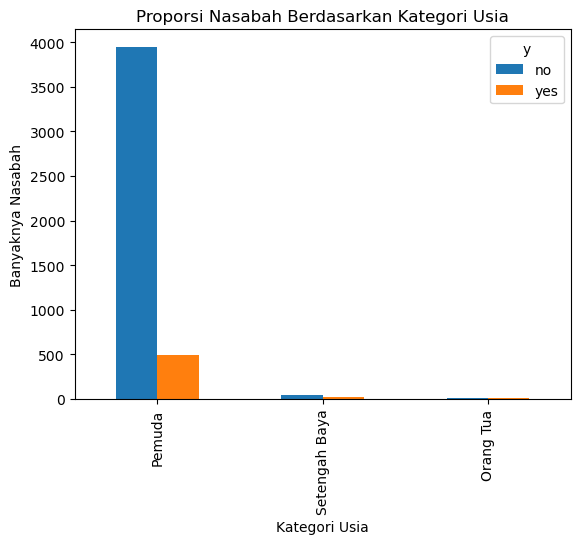

In [34]:
# MELIHAT PERBANDINGAN TOTAL NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN KATEGORI USIA

pd.crosstab(df.age_range,df.y).plot(kind='bar')
plt.title('Proporsi Nasabah Berdasarkan Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Banyaknya Nasabah')

Dari hasil chart di atas, kita bisa menyimpulkan bahwa nasabah yang sudah berlangganan mayoritas berusia diantara 19-65 tahun sebanyak 488 dan nasabah yang belum berlangganan mayoritas berusia diantara 19-65 tahun sebanyak 3946. Sementara untuk orang tua sangat dikit yang ingin berlangganan deposito.

## BULAN BERAPA KAMPANYE PALING BANYAK DILAKUKAN?

In [35]:
# MEMBUAT KOLOM BARU UNTUK NOMOR BULAN

bulan_dict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12
}

df['month_num'] = df['month'].map(bulan_dict)
df

,age,job,marital,education,month,campaign,y,age_range,month_num
0,30,unemployed,married,primary,oct,1,no,Pemuda,10
1,33,services,married,secondary,may,1,no,Pemuda,5
2,35,management,single,tertiary,apr,1,no,Pemuda,4
3,30,management,married,tertiary,jun,4,no,Pemuda,6
4,59,blue-collar,married,secondary,may,1,no,Pemuda,5
...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,jul,5,no,Pemuda,7
4517,57,self-employed,married,tertiary,may,1,no,Pemuda,5
4518,57,technician,married,secondary,aug,11,no,Pemuda,8
4519,28,blue-collar,married,secondary,feb,4,no,Pemuda,2


In [36]:
# MENGHITUNG TOTAL NASABAH YANG SUDAH BERLANGGANAN BERDASARKAN BULAN KAMPANYE

total_berlangganan_per_month = df[df['y'] == 'yes'].groupby('month_num').size().reset_index(name='total')
# total_berlangganan_per_month = df.groupby([df['y'] == 'yes'])['month'].sort_values(ascending=False)
print("Total nasabah yang sudah berlangganan deposito berdasarkan bulan kampanye:")
print(total_berlangganan_per_month)

Total nasabah yang sudah berlangganan deposito berdasarkan bulan kampanye:
    month_num  total
0           1     16
1           2     38
2           3     21
3           4     56
4           5     93
5           6     55
6           7     61
7           8     79
8           9     17
9          10     37
10         11     39
11         12      9


In [37]:
# MENGHITUNG TOTAL NASABAH YANG BELUM BERLANGGANAN BERDASARKAN BULAN KAMPANYE

total_belum_berlangganan_per_month = df[df['y'] == 'no'].groupby('month_num').size().reset_index(name='Total')
print("Total nasabah yang belum berlangganan deposito berdasarkan bulan kampanye:")
print(total_belum_berlangganan_per_month)

Total nasabah yang belum berlangganan deposito berdasarkan bulan kampanye:
    month_num  Total
0           1    132
1           2    184
2           3     28
3           4    237
4           5   1305
5           6    476
6           7    645
7           8    554
8           9     35
9          10     43
10         11    350
11         12     11


Text(0, 0.5, 'Banyaknya Nasabah')

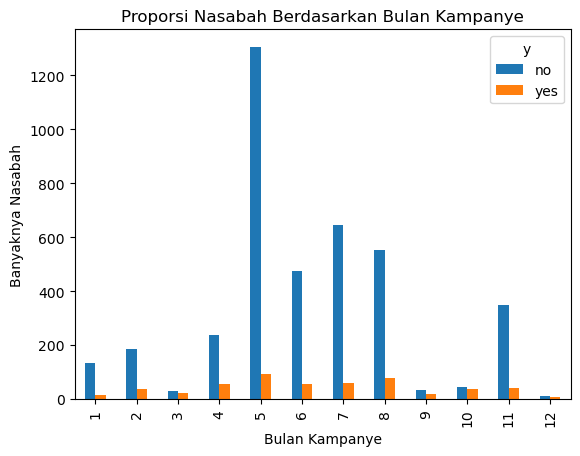

In [38]:
# MELIHAT PERBANDINGAN TOTAL NASABAH YANG SUDAH BERLANGGANAN DAN YANG BELUM BERLANGGANAN BERDASARKAN BULAN KAMPANYE

pd.crosstab(df.month_num,df.y).plot(kind='bar')
plt.title('Proporsi Nasabah Berdasarkan Bulan Kampanye')
plt.xlabel('Bulan Kampanye')
plt.ylabel('Banyaknya Nasabah')

Dari hasil chart di atas, kita bisa menyimpulkan bahwa bulan yang sering terjadi kampanye adalah bulan Mei yaitu sebanyak 1.398 dimana di bulan tersebut nasabah yang sudah berlangganan deposito sebanyak 93 dan yang belum berlangganan deposito sebanyak 1305. Dan yang paling sedikit melakukan kampanye adalah bulan Desember.

## STATISTIKA DESKRIPTIF

### Bagaimana persebaran data usia nasabah yang berlangganan deposito

In [39]:
df

,age,job,marital,education,month,campaign,y,age_range,month_num
0,30,unemployed,married,primary,oct,1,no,Pemuda,10
1,33,services,married,secondary,may,1,no,Pemuda,5
2,35,management,single,tertiary,apr,1,no,Pemuda,4
3,30,management,married,tertiary,jun,4,no,Pemuda,6
4,59,blue-collar,married,secondary,may,1,no,Pemuda,5
...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,jul,5,no,Pemuda,7
4517,57,self-employed,married,tertiary,may,1,no,Pemuda,5
4518,57,technician,married,secondary,aug,11,no,Pemuda,8
4519,28,blue-collar,married,secondary,feb,4,no,Pemuda,2


In [40]:
# Measurement of Central Tendency

dy = df.query("y == 'yes'")

print(f'Mean usia nasabah : {dy["age"].mean():.2f}')
print(f'Median usia nasabah : {dy["age"].median():.2f}')
print(f'Modus usia nasabah : {dy["age"].mode()[0]:.2f}')
print(f"Standar Deviasi : {dy['age'].std():.2f}")
print(f"Variance : {dy['age'].var():.2f}")
print(f"Range : {dy['age'].max() - dy['age'].min()}")


Mean usia nasabah : 42.49
Median usia nasabah : 40.00
Modus usia nasabah : 32.00
Standar Deviasi : 13.12
Variance : 172.02
Range : 68


PENJELASAN: 

- Mean menunjukkan rata-rata usia nasabah yaitu 42 tahun
- Median menujukkan nilai tengah dari usia nasabah yaitu 40 tahun
- Modus menunjukkan banyak nasabah yang berumur 32 tahun
- Standar Deviasi = 13,12 artinya usia nasabah yang berlangganan deposito memiliki variasi sekitar 13 tahun dari mean usia 42 tahun
- Variance = banyaknya variasi usia nasabah yang berlangganan deposito adalah 13 tahun
- Range usia nasabah yang berlangganan deposito adalah 68 tahun

In [41]:
print(f"Skewness: {dy['age'].skew():.2f}")
print(f"Kurtosis: {dy['age'].kurtosis():.2f}")

Skewness: 0.85
Kurtosis: 0.39


PENJELASAN:

- Skewness 0,85 artinya distribusi usia cenderung condong ke kanan, dengan ekor yang lebih panjang di sisi kanan dari mean. Berarti ada beberapa nasabah yang lebih tua dari rata-rata usia nasabah yang berlangganan deposito
- Kurtosis 0,39 artinya distribusi usia memiliki puncak yang sedikit lebih datar daripada distribusi normal.

<Axes: >

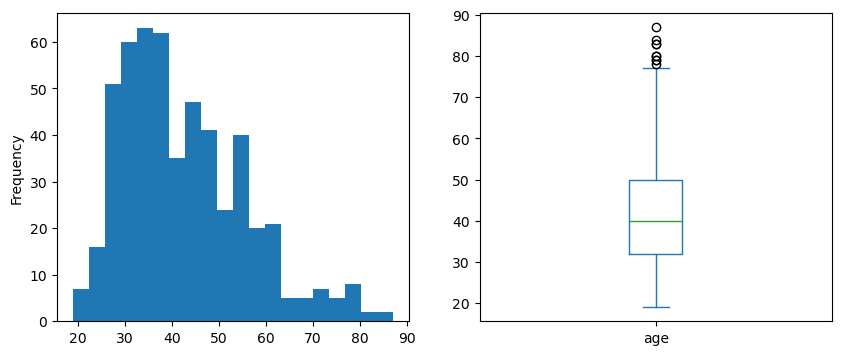

In [42]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

dy['age'].plot(kind='hist',bins=20,ax=ax[0])
dy['age'].plot(kind='box',ax=ax[1])

Di lihat dari chart di atas dapat disimpulkan bahwa persebaran usia nasabah yang sudah berlangganan sangat luas dimana usia nasabah yang sudah berlangganan deposito mayoritas berkisar diumur 30 tahun sampai 40 tahun. Di umur tersebut nasabah lebih tertarik untuk melakukan investasi. 

## STATISTIKA INFERENSIAL

### Faktor-faktor apa yang mempengaruhi keputusan nasabah untuk berlangganan deposito?

In [43]:
df.head()

,age,job,marital,education,month,campaign,y,age_range,month_num
0,30,unemployed,married,primary,oct,1,no,Pemuda,10
1,33,services,married,secondary,may,1,no,Pemuda,5
2,35,management,single,tertiary,apr,1,no,Pemuda,4
3,30,management,married,tertiary,jun,4,no,Pemuda,6
4,59,blue-collar,married,secondary,may,1,no,Pemuda,5


##### JOB

In [44]:
job_faktor = pd.crosstab(df['job'],df['y'])
job_faktor

y,no,yes
job,,
admin,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


In [45]:
res = stats.chi2_contingency(job_faktor)
print("P-value:",res.pvalue)

P-value: 1.901391096662705e-10


H0 : Tidak ada hubungan antara job dan keputusan nasabah untuk berlangganan deposito

H1 : Ada hubungan antara job dan keputusan nasabah untuk berlangganan deposito

Critical value: 0.05

p-val = 1.901391096662705e-10 < critical value

H0 rejected

**KESIMPULAN**:

Karena nilai p-value jauh lebih dari nilai critical value, dapat disimpulkan bahwa pekerjaan memiliki pengaruh yang signifikan terhadap keputusan nasabah untuk berlangganan deposito.

##### MARITAL

In [46]:
marital_faktor = pd.crosstab(df['marital'],df['y'])
marital_faktor

y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


In [47]:
res = stats.chi2_contingency(marital_faktor)
print("P-value:",res.pvalue)

P-value: 7.373535401823763e-05


H0 : Tidak ada hubungan antara marital dan keputusan nasabah untuk berlangganan deposito

H1 : Ada hubungan antara marital dan keputusan nasabah untuk berlangganan deposito

Critical value: 0.05

p-val = 7.373535401823763e-05 < critical value

H0 rejected

**KESIMPULAN**:

Karena nilai p-value jauh lebih dari nilai critical value, dapat disimpulkan bahwa status perkawinan memiliki 

pengaruh yang signifikan terhadap keputusan nasabah untuk berlangganan deposito.

##### EDUCATION

In [48]:
education_faktor = pd.crosstab(df['education'],df['y'])
education_faktor

y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [49]:
res = stats.chi2_contingency(education_faktor)
print("P-value:",res.pvalue)

P-value: 0.001625240003630989


H0 : Tidak ada hubungan antara marital dan keputusan nasabah untuk berlangganan deposito

H1 : Ada hubungan antara marital dan keputusan nasabah untuk berlangganan deposito

Critical value: 0.05

p-val = 0.001625240003630989 < critical value

H0 rejected

**KESIMPULAN**:

Karena nilai p-value jauh lebih dari nilai critical value, dapat disimpulkan bahwa tingkat pendidikan 

memiliki pengaruh yang signifikan terhadap keputusan nasabah untuk berlangganan deposito.

# **PENGAMBILAN KESIMPULAN**

Berdasarkan analisis dan perhitungan yang sudah dilakukan, kita dapat mengambil benang merah yaitu:
- Terdapat 11,52% nasabah yang sudah berlangganan deposito dan 88,48% nasabah yang belum berlangganan deposito.
-  Mayoritas status perkawinan nasabah yang sudah berlangganan deposito adalah nasabah yang sudah menikah. Jenis pekerjaan yang paling banyak berlangganan deposito adalah orang bekerja dibidang management. 
- Nasabah yang sudah berlangganan adalah yang memiliki pendidikan secondary namun pendidikan tersebut juga memiliki nasabah yang belum berlangganan deposito. Usia nasabah dikisaran 19 sampai 65 tahun sangat tertarik untuk berlangganan deposito karena di usia tersebut nasabah masih berada di umur yang produktif, sedangkan untuk nasabah yang memiliki umur diantara 79 sampai 99 tahun tidak memiliki ketertarikan yang besar untuk berlangganan deposito. 
- Di bulan Mei, banyak sekali kampanye yang dilakukan tetapi tidak semua kampanye berhasil, lebih banyak nasabah yang belum berlangganan deposito.
- Di antara ketiga faktor yaitu jenis pekerjaan, pendidikan, dan martial, faktor yang mempengaruhi keputusan nasabah untuk nasabah deposito adalah pendidikan. Karena semakin nasabah memiliki pendidikan yang tinggi, semakin tertarik untuk melakukan investasi deposito mengingat menginvestasi deposito memiliki keuntungan.

## **REKOMENDASI**

Jika kita ingin mengoptimalkan strategi pemasaran untuk meningkatkan banyaknya nasabah yang akan berlangganan deposito, kita harus tau faktor-faktor yang paling mempengaruhi yaitu dari sisi pendidikan nasabah yang memiliki pendidikan secondary, yang rentang usia nya sekitar 25-40 tahun,, yang jenis pekerjaan nya adalah management. Sangat disarankan untuk melakukan kampanye di Mei, karens antusias nasabah terhadap investasi deposito sangat tinggi.